In [8]:
from IPython.display import IFrame

In [9]:
%matplotlib inline

In [10]:
# First, let's import some useful packages:
import os
import sys
import astropy
import pylab           as     pl
import pandas          as     pd
import numpy           as     np


from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image
from   pkg_resources   import resource_filename

# *Dark Energy*

In 1998, the world would change forever.  Larry Page and Sergey Brin founded Google, the American Unity node and Russian Zarya module would be brought together to form the [International Space Station](https://en.wikipedia.org/wiki/International_Space_Station), and Lawrence Berkeley Lab's
very own Saul Perlmutter, Brian Schmidt and Adam Reiss irrefutably confirmed the existence of _Dark Energy_. Here's Saul impressing some young Berkeley researchers with these results at the time:

![title](desihigh/images/perlmutter.png)

So what was everyone looking at?  Let's breakdown the data.

Saul and his team measured the redshift ($z$) and the effective magnitude for several Type Ia Supernovae (https://en.wikipedia.org/wiki/Type_Ia_supernova)

In [6]:
perl    = resource_filename('desihigh', 'dat/perlmutter.txt')

In [12]:
dat     = pd.read_csv(perl, names=['z', 'Effective magnitude'], comment='#', sep='\s+')
#show the first 5 rows of dat
toprint = dat.head()
toprint

,z,Effective magnitude
0,0.458,23.11
1,0.354,22.38
2,0.425,22.13
3,0.374,21.72
4,0.420,22.55


A plot would show this a lot more clearly:

Text(0, 0.5, 'Effective magnitude')

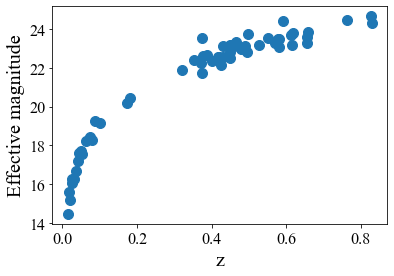

In [13]:
#plot data here
pl.scatter(dat['z'], dat['Effective magnitude'])

#label axies here
pl.xlabel('z')
pl.ylabel('Effective magnitude')

Saul has good reason to believe (really, he had to tweak them a bit first) that every [type Ia supernovae](https://en.wikipedia.org/wiki/Type_Ia_supernova) shown here was equally bright intrinsically, but those at high redshift appeared relatively faint compared to those at low redshift, as they were simply further away.  This explains the trend shown, given that 'effective magnitude' is the awkward way in which astronomers typically express how bright something appears.

So let's use Saul's data to fit our model for an expanding universe.

In [15]:
from astropy.cosmology import FlatLambdaCDM

def lumdist(z, olambda):
  cosmo = FlatLambdaCDM(H0=70, Om0=1. - olambda, Tcmb0=2.725)
    
  return  cosmo.luminosity_distance(z)   

We then need to convert this distance into how astronomers measure brightness:

In [25]:
def effmag(z, olambda, MB):
  DL = lumdist(z, olambda)   

  return MB + 5. * np.log10(DL.value)   
MB = 5.8280290

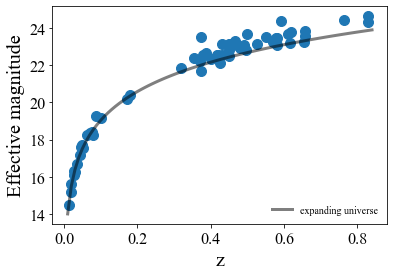

In [19]:
#plot data
plt.scatter(dat['z'], dat['Effective magnitude'])

#our best fit line using now using magnitude for distance, which is a logorithmic scale
zs = np.arange(0.01, 0.85, 0.01)
plt.plot(zs, effmag(zs, 0.0, MB), c='k', label='expanding universe', alpha=0.5)


plt.xlabel('z')
plt.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

<b>Type your answers to the following questions in this cell</b>

Take a look at your graph. Notice how many data points are above and below the best fit line. What does this tell you about how bright we would expect the supernovae to be vs. how bright they actually are?

If the supernovae are more or less bright then we would expect about the expansion rate of the universe? (How is it changing over time?)


# Optimizing using Chi squared

Lets try to get a better model using chi squared. 

In [59]:
from scipy.optimize import minimize

In [27]:
def chi2(x):
     olambda = x #dark energy percentage
     MB      = 5.82802908 #absolute value is fixed for type 1a supernovae
    
     model   = effmag(dat['z'], olambda, MB) 
     
     return  np.sum((dat['Effective magnitude'] - model)**2.) 


Using chi squared, create the "best" best fit line model for the universe. You want to minimize the chi2 function to get the best fit. You can manually try different values, create a for loop and try a bunch of different values, or anything inbetween. Whatever value of x gives you the lowest chi2 value is the percent of our universe that is dark energy!

You can start by getting the chi2 value of a model with 0% dark energy. As long as your chi2 value is higher than this you are making progress!

In [ ]:
#test you chi2 values here! You can always add more cells if you need them.


In [ ]:
#test you chi2 values here! You can always add more cells if you need them.


In [ ]:
#test you chi2 values here! You can always add more cells if you need them.


When you are ready, you can plot your model below. Note that the effective magnitude function takes olambda as an arguement. This is percent dark energy in our universe.

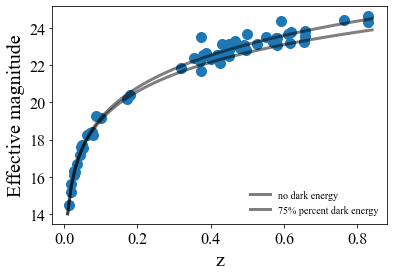

In [28]:
#plot data
plt.scatter(dat['z'], dat['Effective magnitude'])

#plot best fit curve
zs = np.arange(0.01, 0.85, 0.01)
pl.plot(zs, effmag(zs, 0 ,MB ), c='k',   label='no dark energy', alpha=0.5)
pl.plot(zs, effmag(zs, .75 ,MB ), c='k',   label='75% percent dark energy', alpha=0.5)


pl.xlabel('z')
pl.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

Your curve should now be a much better fit with the data. Congrats, you just found out how much dark energy is in the universe! As the first people to make this measurement, Saul, together with Brian Schmidt and Adam Reiss, would be awarded the 2011 Nobel Prize for their work.

![title](desihigh/images/perlmutter_nobel.jpg)

Photo credit: Lina Göransson, Nobel Prize Foundation (2011)

You can find all the details of his work here:  https://arxiv.org/pdf/astro-ph/9812133.pdf.  Warning, this is for the pros so don't worry if you don't understand too much!

As honorary principal at DESI High, Saul has a special opening address to all the students, including you! 

[A welcome to DESI High, Prof. Saul Perlmutter](https://github.com/michaelJwilson/desihigh/blob/main/desihigh/perlmutter/letter.pdf)

The primary motivation for DESI is to repeat similar distant-redshift measurements much more precisely and learn much more about this spooky Dark Energy! 